In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# para la validación cruzada
import math as mt
def average(numbers):
    """
    Calcula la media aritmética simple
    """
    try:
        return float(sum(numbers)) / max(len(numbers), 1)
    except ZeroDivisionError:
        return 0

# 1 - Obteniendo los datos. Preprocesado (normalización)

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
%matplotlib inline

9


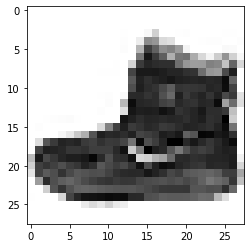

In [9]:
import matplotlib.pyplot as plt

image_index = 0
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Normalizar los píxeles de las imágenes

In [10]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train , x_test = x_train/255.0 , x_test/255.0

In [11]:
x_train[34]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16470588],
        [0.43137255],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.61176471],
        [0.08235294],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.1254902 ],
        [0.21960784],
        [0.15686275],
        [0.08235294],
        [0.76470588],
        [0.66666667],
        [0.67843137],
        [0.75686275],
        [0.71764706],
        [0.71764706],
        [0.95294118],
        

In [12]:
x_train.size/784

60000.0

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Convertimos en valores booleanos la característica a predecir (necesario )

In [14]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 2 - Diseñando el modelo
Ahora hay que diseñar la arquitectura del modelo de CNN que vamos a utilizar. 

In [15]:
batch_size    = 10    
n_classes     = 10
n_epochs      = 50  
img_rows, img_cols = 28,28


# para la validación cruzada
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [   
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        mode='max',
        verbose=1),
    ModelCheckpoint(
        './model2',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=0)
]

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import maxnorm

In [17]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(img_rows, img_cols, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

Compilar el modelo

In [18]:
from keras.optimizers import SGD
lrate = 0.01
decay = lrate / n_epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Entrenar el modelo

In [18]:
from sklearn.model_selection import KFold
seed = 7
np.random.seed(seed)
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_train)

acc_scores = list()

for fold, (train_index, test_index) in enumerate(kf.split(x_train)):
    print('\n Fold %d' % (fold))

    x_tr, x_v = x_train[train_index], x_train[test_index]
    y_tr, y_v = y_train[train_index], y_train[test_index]

    model.fit(
        x_tr,
        y_tr,
        epochs=n_epochs,
        validation_data=(x_v, y_v),
        verbose=2,
        batch_size=batch_size,
        callbacks=callbacks,
        shuffle=True
    )

    acc = model.evaluate(x_v, y_v, verbose=0)
    acc_scores.append(acc[1])

    print('Fold %d: Accuracy %.2f%%' % (fold, acc[1] * 100))

print('Accuracy scores: ', acc_scores)



 Fold 0
Epoch 1/50
4800/4800 - 184s - loss: 0.5663 - accuracy: 0.7916 - val_loss: 0.3316 - val_accuracy: 0.8725
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 2/50
4800/4800 - 183s - loss: 0.3427 - accuracy: 0.8747 - val_loss: 0.2900 - val_accuracy: 0.8886
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 3/50
4800/4800 - 187s - loss: 0.2887 - accuracy: 0.8934 - val_loss: 0.2568 - val_accuracy: 0.9038
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 4/50
4800/4800 - 178s - loss: 0.2563 - accuracy: 0.9058 - val_loss: 0.2373 - val_accuracy: 0.9106
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 5/50
4800/4800 - 177s - loss: 0.2333 - accuracy: 0.9127 - val_loss: 0.2241 - val_accuracy: 0.9175
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 6/50
4800/4800 - 176s - loss: 0.2142 - accuracy: 0.9204 - val_loss: 0.2290 - val_accuracy: 0.9138
Epoch 7/50
4800/4800 - 175s - loss: 0.1993 - accuracy: 0.9257 - val_loss: 0.2306 - val_accuracy: 0.9138
Epoch 8/

Epoch 7/50
4800/4800 - 169s - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0111 - val_accuracy: 0.9978
Epoch 8/50
4800/4800 - 174s - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0106 - val_accuracy: 0.9978
Epoch 9/50
4800/4800 - 174s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0107 - val_accuracy: 0.9978
Epoch 10/50
4800/4800 - 174s - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0114 - val_accuracy: 0.9973
Epoch 11/50
4800/4800 - 176s - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0123 - val_accuracy: 0.9971
Epoch 00011: early stopping
Fold 3: Accuracy 99.71%

 Fold 4
Epoch 1/50
4800/4800 - 175s - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0062 - val_accuracy: 0.9992
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 2/50
4800/4800 - 172s - loss: 0.0276 - accuracy: 0.9905 - val_loss: 0.0058 - val_accuracy: 0.9997
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 3/50
4800/4800 - 175s - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0055 - val_accuracy: 0.9998
INF

NameError: name 'sum_of_square_deviation' is not defined

In [20]:
mean_acc = average(acc_scores)
mean_acc

0.9802499890327454

In [21]:
import time
start_time = time.time()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,          # nº de veces q se repite el entrenam.
          verbose=1,
          validation_data=(x_test, y_test))

training_time = time.time() - start_time
print(training_time)


Epoch 1/50
6000/6000 [==============================] - 227s 38ms/step - loss: 0.0361 - accuracy: 0.9876 - val_loss: 0.3274 - val_accuracy: 0.9253
Epoch 2/50
6000/6000 [==============================] - 227s 38ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.3375 - val_accuracy: 0.9243
Epoch 3/50
6000/6000 [==============================] - 230s 38ms/step - loss: 0.0348 - accuracy: 0.9882 - val_loss: 0.3317 - val_accuracy: 0.9246
Epoch 4/50
6000/6000 [==============================] - 227s 38ms/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 0.3391 - val_accuracy: 0.9243
Epoch 5/50
6000/6000 [==============================] - 226s 38ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 0.3342 - val_accuracy: 0.9246
Epoch 6/50
6000/6000 [==============================] - 223s 37ms/step - loss: 0.0325 - accuracy: 0.9890 - val_loss: 0.3417 - val_accuracy: 0.9251
Epoch 7/50
6000/6000 [==============================] - 224s 37ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0

# 3 - Evaluación y obtención de métricas
Una vez entrenado el modelo, vamos a probarlo con el conjunto de test

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Test loss: 0.4100622534751892
Test accuracy: 0.9264000058174133


## Obtener la matriz de confusión

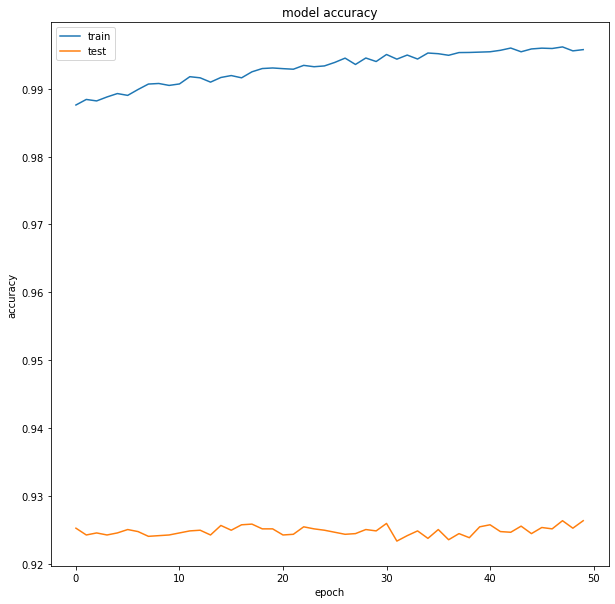

In [23]:
import matplotlib.pyplot as plt

fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()